In [1]:
# Step 1: Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Step 2: Load the Titanic Dataset

file_path = "../data/titanic.csv"  # path from notebooks/ folder

df = pd.read_csv(file_path)

# Show first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Step 3: Explore basic dataset information

# Shape of the dataset
print("Shape of dataset:", df.shape)

# Data types
print("\nData Types:\n")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n")
df.describe(include='all').transpose()


Shape of dataset: (891, 12)

Data Types:

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Summary Statistics:



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [4]:
# Step 4: Handle missing values

# Fill numerical missing values with median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Fill categorical missing values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# Verify missing values again
df.isnull().sum()


C:\Users\HP\AppData\Local\Temp\ipykernel_10540\4132148892.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10540\4132148892.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [5]:
# Step 5: Handle categorical variables

from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary categories
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# One-Hot Encoding for multi-class categories
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True


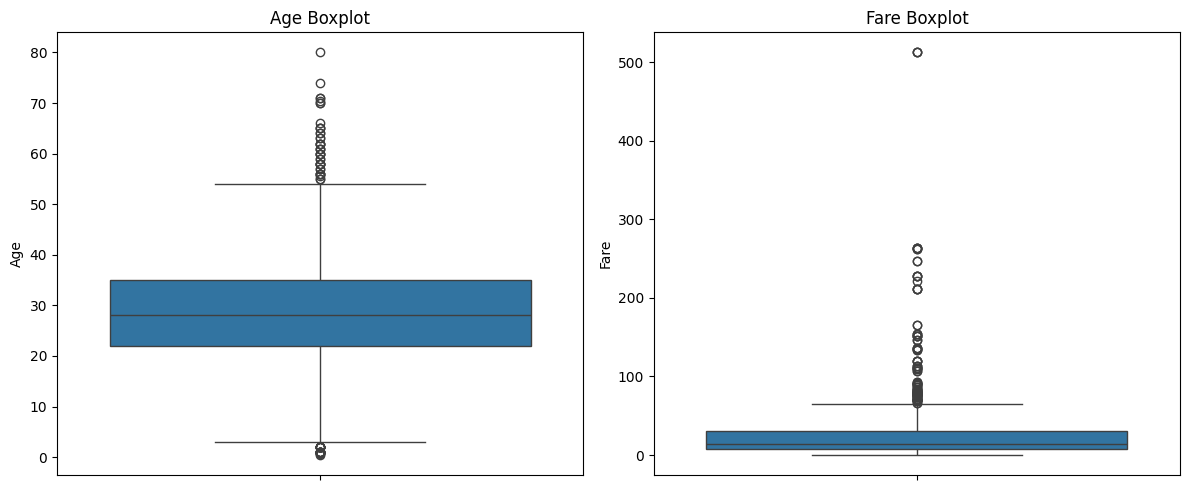

In [6]:
# Step 6: Outlier detection using boxplots

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=df['Age'])
plt.title('Age Boxplot')

plt.subplot(1,2,2)
sns.boxplot(y=df['Fare'])
plt.title('Fare Boxplot')

plt.tight_layout()
plt.show()


In [8]:
# Step 7: Remove outliers using IQR method

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_clean

# Remove outliers from Age
df = remove_outliers(df, 'Age')

# Remove outliers from Fare
df = remove_outliers(df, 'Fare')

df.shape


(718, 12)

In [9]:
# Step 8: Standardize numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,0.681465,"Braund, Mr. Owen Harris",1,-0.607611,0.686268,-0.40491,A/5 21171,-0.751265,False,True
2,3,1,0.681465,"Heikkinen, Miss. Laina",0,-0.207827,-0.484137,-0.40491,STON/O2. 3101282,-0.700265,False,True
3,4,1,-2.114490,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.691688,0.686268,-0.40491,113803,2.712961,False,True
4,5,0,0.681465,"Allen, Mr. William Henry",1,0.691688,-0.484137,-0.40491,373450,-0.690821,False,True
5,6,0,0.681465,"Moran, Mr. James",1,-0.007934,-0.484137,-0.40491,330877,-0.659971,True,False


In [10]:
# Step 9: Save the cleaned dataset

output_path = "../outputs/cleaned_titanic.csv"
df.to_csv(output_path, index=False)

print("Cleaned dataset saved successfully at:", output_path)


Cleaned dataset saved successfully at: ../outputs/cleaned_titanic.csv
